In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import nltk
import string
import re
from spellchecker import SpellChecker

In [2]:
county_till_2016 = pd.read_csv('raw_data/countypres_2000-2016.csv')
county_2020 = pd.read_csv('raw_data/2020_US_County_Level_Presidential_Results.csv')
county_2020 = county_2020[['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem', 'total_votes']]
county_2020 = county_2020.rename(columns = {'state_name': 'state','county_name':'county','county_fips': 'FIPS'})
county_2020.head()

,state,FIPS,county,votes_gop,votes_dem,total_votes
0,Alabama,1001,Autauga County,19838,7503,27770
1,Alabama,1003,Baldwin County,83544,24578,109679
2,Alabama,1005,Barbour County,5622,4816,10518
3,Alabama,1007,Bibb County,7525,1986,9595
4,Alabama,1009,Blount County,24711,2640,27588


In [3]:
county_2020.insert(loc=0, column = 'year', value = [2020 for i in range(county_2020.shape[0])])
county_2020 = county_2020[['year', 'state', 'county', 'FIPS', 'votes_dem', 'votes_gop', 'total_votes']]
county_2020.head()

,year,state,county,FIPS,votes_dem,votes_gop,total_votes
0,2020,Alabama,Autauga County,1001,7503,19838,27770
1,2020,Alabama,Baldwin County,1003,24578,83544,109679
2,2020,Alabama,Barbour County,1005,4816,5622,10518
3,2020,Alabama,Bibb County,1007,1986,7525,9595
4,2020,Alabama,Blount County,1009,2640,24711,27588


In [4]:
county_till_2016 = county_till_2016[['year', 'state','county', 'FIPS', 'party', 'candidatevotes', 'totalvotes']]
county_till_2016 = county_till_2016.dropna()
county_till_2016.head()

,year,state,county,FIPS,party,candidatevotes,totalvotes
0,2000,Alabama,Autauga,1001.0,democrat,4942.0,17208
1,2000,Alabama,Autauga,1001.0,republican,11993.0,17208
2,2000,Alabama,Autauga,1001.0,green,160.0,17208
4,2000,Alabama,Baldwin,1003.0,democrat,13997.0,56480
5,2000,Alabama,Baldwin,1003.0,republican,40872.0,56480


In [5]:
democrat = county_till_2016[county_till_2016['party'] == 'democrat']['candidatevotes'].reset_index().drop(['index'],axis =1)
repub = county_till_2016[county_till_2016['party'] == 'republican']['candidatevotes'].reset_index().drop(['index'],axis =1)
total_votes = county_till_2016[county_till_2016['party'] == 'democrat']['totalvotes'].reset_index().drop(['index'],axis =1)
county_till_2016_simplified = county_till_2016[county_till_2016['party'] == 'democrat'][['year', 'state','county', 'FIPS']].reset_index()
county_till_2016_simplified = county_till_2016_simplified.drop(['index'], axis = 1)
county_till_2016_simplified['votes_dem'] = democrat
county_till_2016_simplified['votes_gop'] = repub
county_till_2016_simplified['total_votes'] = total_votes
county_till_2016_simplified.head()

,year,state,county,FIPS,votes_dem,votes_gop,total_votes
0,2000,Alabama,Autauga,1001.0,4942.0,11993.0,17208
1,2000,Alabama,Baldwin,1003.0,13997.0,40872.0,56480
2,2000,Alabama,Barbour,1005.0,5188.0,5096.0,10395
3,2000,Alabama,Bibb,1007.0,2710.0,4273.0,7101
4,2000,Alabama,Blount,1009.0,4977.0,12667.0,17973


In [6]:
frames = [county_till_2016_simplified, county_2020]
df = pd.concat(frames).reset_index().drop(['index'], axis =1)
#df.to_csv('merged.csv',index = False)
df2 = df[['year','state','votes_dem', 'votes_gop','total_votes']].groupby(['state','year']).sum()
#df2.to_csv('df2.csv', index = True)
states = df2.index.get_level_values(0).unique()
df2['votes_dem_perc'] = 100*df2['votes_dem']/df2['total_votes']
df2['votes_gop_perc'] = 100*df2['votes_gop']/df2['total_votes']
df2 = df2.drop(['votes_dem', 'votes_gop'], axis =1)
df2 = df2.drop(['total_votes'], axis =1)
df2.head()

votes_dem_perc  votes_gop_perc
state   year                                
Alabama 2000       41.589285       56.465184
        2004       36.844402       62.460690
        2008       38.740434       60.316913
        2012       38.432866       60.662360
        2016       34.358027       62.083003

In [7]:
ind_df_10 = pd.read_csv("raw_data/independent_expenditure_2010.csv")
ind_df_10 = ind_df_10[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_12 = pd.read_csv("raw_data/independent_expenditure_2012.csv")
ind_df_12 = ind_df_12[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_14 = pd.read_csv("raw_data/independent_expenditure_2014.csv")
ind_df_14 = ind_df_14[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_16 = pd.read_csv("raw_data/independent_expenditure_2016.csv")
ind_df_16 = ind_df_16[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_18 = pd.read_csv("raw_data/independent_expenditure_2018.csv")
ind_df_18 = ind_df_18[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_20 = pd.read_csv("raw_data/independent_expenditure_2020.csv")
ind_df_20 = ind_df_20[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
frames = [ind_df_10, ind_df_12, ind_df_14,ind_df_16, ind_df_18, ind_df_20 ]
total_ind_exp = pd.concat(frames)
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
total_ind_exp = total_ind_exp.reset_index(drop = True)
total_ind_exp.head()


/Users/riteshsuhag/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/riteshsuhag/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/riteshsuhag/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,can_office_state,cand_pty_aff,exp_amo,exp_date,agg_amo,sup_opp,pur,fec_election_yr
0,NY,NaN,98844.72,14-OCT-10,98844.72,S,MAILERS,2010
1,MA,NaN,74250.00,12-JAN-10,74250.00,S,ROBO CALLS,2010
2,MA,NaN,7898.40,08-SEP-10,207898.40,S,LIVE PHONE BANK CALLS,2010
3,MA,NaN,32000.00,08-SEP-10,239898.40,S,LIVE PHONE BANK CALLS,2010
4,MA,NaN,150000.00,08-SEP-10,200000.00,S,RADIO ADS,2010


In [8]:
total_ind_exp['cand_pty_aff'].unique()

array([nan, 'REPUBLICAN PARTY', 'DEMOCRATIC PARTY', 'NONE',
       'DEMOCRATIC-FARMER-LABOR', 'LIBERTARIAN PARTY', 'OTHER',
       'INDEPENDENT', 'CONSERVATIVE PARTY', 'CONSTITUTION PARTY',
       'UNKNOWN', 'WRITE-IN', 'GREEN PARTY'], dtype=object)

In [9]:
# Creating a party column
# There are 13 different party affiliations, gruopingthem into republicans adn democrats -

total_ind_exp['party'] = ""

total_ind_exp['party'] = np.where(total_ind_exp['party'] == "",
                                  np.where(total_ind_exp['cand_pty_aff'] == 'DEMOCRATIC PARTY', 
                                  'Democrats', ""), total_ind_exp['party'])
total_ind_exp['party'] = np.where(total_ind_exp['party'] == "",
                                  np.where(total_ind_exp['cand_pty_aff'] == 'DEMOCRATIC-FARMER-LABOR', 
                                  'Democrats', ""), total_ind_exp['party'])
total_ind_exp['party'] = np.where(total_ind_exp['party'] == "",
                                  np.where(total_ind_exp['cand_pty_aff'] == 'REPUBLICAN PARTY', 
                                  'Republicans', ""), total_ind_exp['party'])
total_ind_exp['party'] = np.where(total_ind_exp['party'] == "",
                                  np.where(total_ind_exp['cand_pty_aff'] == 'INDEPENDENT', 
                                  'Indepedents', ""), total_ind_exp['party'])

total_ind_exp.sample(10)

,can_office_state,cand_pty_aff,exp_amo,exp_date,agg_amo,sup_opp,pur,fec_election_yr,party
5773,FL,REPUBLICAN PARTY,8683.50,04-OCT-10,11592.02,S,IE-Rubio-Yard Signs,2010,Republicans
395585,NaN,REPUBLICAN PARTY,22.80,24-OCT-16,1533636.23,O,Salary and Benefits,2016,Republicans
260113,IL,DEMOCRATIC PARTY,4218.45,30-SEP-16,31923.36,S,payroll taxes,2016,Democrats
113547,OH,NaN,35.93,29-AUG-12,22627.06,O,Salary and Benefits,2012,
334459,OH,REPUBLICAN PARTY,24.16,30-JUN-16,115400.58,O,Rental Van,2016,Republicans
385127,NaN,REPUBLICAN PARTY,22.80,13-SEP-16,697067.59,O,Salary and Benefits,2016,Republicans
192889,LA,DEMOCRATIC PARTY,60.00,24-MAY-14,14636.19,O,Salary,2014,Democrats
199045,AR,DEMOCRATIC PARTY,36.00,04-NOV-14,283226.30,O,Mileage,2014,Democrats
2094,WI,DEMOCRATIC PARTY,100.00,30-OCT-10,180037.20,S,canvass payroll,2010,Democrats
144239,NaN,REPUBLICAN PARTY,12.05,11-OCT-12,216389.95,O,Rental Van,2012,Republicans


In [10]:
# Creating temp tables for democrats and republicans (to create initial graph) - 
# Democrats -
dem_party = total_ind_exp[total_ind_exp['party'] == 'Democrats']
dem_exp_total = dem_party.groupby(['fec_election_yr']).agg({"exp_amo" : "sum"})
dem_exp_total['exp_amo'] = round(dem_exp_total['exp_amo'] / 1000000, 4)
dem_exp_total.head(10)
# Republicans -
rep_party = total_ind_exp[total_ind_exp['party'] == 'Republicans']
rep_exp_total = rep_party.groupby(['fec_election_yr']).agg({"exp_amo" : "sum"})
rep_exp_total['exp_amo'] = round(rep_exp_total['exp_amo'] / 1000000, 4)
rep_exp_total.head(10)
# Independents - 
ind_party = total_ind_exp[total_ind_exp['party'] == 'Indepedents']
ind_exp_total = ind_party.groupby(['fec_election_yr']).agg({"exp_amo" : "sum"})
ind_exp_total['exp_amo'] = round(ind_exp_total['exp_amo'] / 1000000, 4)
ind_exp_total.head(10)
# Total expenditure - 
exp_total = total_ind_exp.groupby(['fec_election_yr']).agg({"exp_amo" : "sum"})
exp_total['exp_amo'] = round(exp_total['exp_amo'] / 1000000, 4)
exp_total.head(10)

,exp_amo
fec_election_yr,
2010,392.4027
2012,1470.9545
2014,827.7582
2016,1935.7305
2018,1395.4499
2020,6229.6796


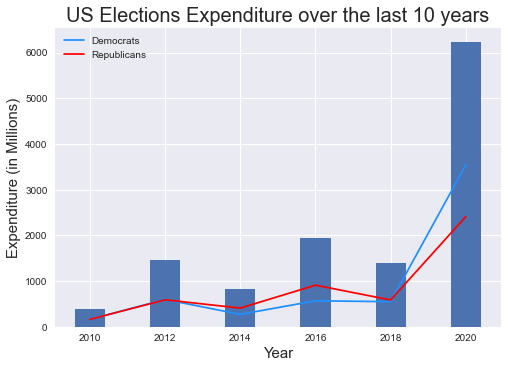

In [11]:
# Plotting the graph -
plt.style.use("seaborn")
plt.bar(exp_total.index, exp_total['exp_amo'])
plt.plot(dem_exp_total.index, dem_exp_total['exp_amo'], color = 'dodgerblue', label = "Democrats")
plt.plot(rep_exp_total.index, rep_exp_total['exp_amo'], color = 'red', label = "Republicans")
plt.title("US Elections Expenditure over the last 10 years", size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Expenditure (in Millions)", size = 15)
plt.legend()
plt.savefig("Initial_Overview.png")
plt.show()

In [12]:
temp = total_ind_exp.copy()

# Converting the purpose column to lower - 
temp['pur'] = temp['pur'].str.lower()

# Saving the unique values in a dataframe - 
purpose_df = temp[['pur']]
purpose_df = purpose_df.drop_duplicates(subset=['pur']).reset_index()
purpose_df.drop(['index'], axis = 1, inplace = True)

# ~~~~~~~~~~~~~~~~~ Checking the spelling - 

# pip install spellchecker
# pip install pyspellchecker

spell = SpellChecker()

def correcting_misspelled_words(user_string):
    if pd.isnull(user_string):
        pass
    else:
        user_string = re.sub('[^A-Za-z0-9]+', ' ', user_string)
        user_string = ' '.join([w for w in user_string.split() if len(w)>1])
        user_string = ' '.join([spell.correction(word) if word != 'tv' else 'tv' for word in user_string.split(' ')])
    return user_string

purpose_df['cleaned_pur'] = purpose_df['pur'].apply(correcting_misspelled_words)

# Category column - 
purpose_df['category'] = ''


# Words for Advertisement Category - 
word_list = ['ads', 'tv', 'radio', 'ad', 'media', 'production', 'newspaper', 'signs', 'print', 'prints', 'printing', 'stickers', 'sticker',
             'hangers', 'hanger', 'billboards', 'billboard', 'flyers', 'flyer', 'leaflet', 'leaflets', 'advertise', 'advertis', 'advertising',
             'advertisment', 'fliers', 'flier', 'promotional', 'signage', 'sign', 'flags']
expression = '|'.join(word_list)
y = purpose_df['cleaned_pur'].str.contains(expression)
purpose_df['category'] = np.where(purpose_df['category'] == '', 
                                  np.where(purpose_df['cleaned_pur'].str.contains(expression), 'Advertisement', ''), 
                                  purpose_df['category'])

# Words for Communications Category - 
word_list = ['calls', 'call', 'phone', 'phones', 'message', 'mssages', 'communicate', 'communication', 'communications', ' postcards', 
             'postcard', 'mail', 'mailing', 'mails', 'telemarket', 'telemarketing', 'telegram', 'telegrams', 'postage', 'letter']
expression = '|'.join(word_list)
purpose_df['category'] = np.where(purpose_df['category'] == '', 
                                  np.where(purpose_df['cleaned_pur'].str.contains(expression), 'Communications', ''), 
                                  purpose_df['category'])

# Words for Logistics Category - 
word_list = ['travel', 'traveling', 'travels', 'reimbursement', 'reimbursements', 'office', 'offices', 'supplies', 'supply', 'equipment',
             'equipments', 'rental', 'rentals', 'material', 'materials', 'transportation', 'transport', ' lodging', 'lodge', 'card', 'cards',
             'food', 'beverage', 'foods', 'beverages', 'gas', 'petrol', 'house', 'houses', 'housing', 'rent', 'travel', 'travels', 'parking',
             'park', 'internet', 'service', 'water', 'ice', 'bus', 'hotel', 'television', 'meal', 'airfare', 'taxi', 'flight', 'mileage',
             'coffee', 'donuts', 'expenses']
expression = '|'.join(word_list)
y = purpose_df['cleaned_pur'].str.contains(expression)
purpose_df['category'] = np.where(purpose_df['category'] == '', 
                                  np.where(purpose_df['cleaned_pur'].str.contains(expression), 'Logistics', ''), 
                                  purpose_df['category'])



# Words for Canvas/Campaign Category - 
word_list = ['canvasser', 'canvas', 'canvass', 'canvassed', 'canvassing', 'canvasses', 'campaign', 'research', 'consultant', 'consulting', 
             'survey', 'analysis', 'yahoo', 'estimate', 'search']
expression = '|'.join(word_list)
y = purpose_df['cleaned_pur'].str.contains(expression)
purpose_df['category'] = np.where(purpose_df['category'] == '', 
                                  np.where(purpose_df['cleaned_pur'].str.contains(expression), 'Canvas/Research', ''), 
                                  purpose_df['category'])

# Others - 
purpose_df['category'] = np.where(purpose_df['category'] == '', 'Others', purpose_df['category'])


In [13]:
total_ind_exp['pur_temp'] = total_ind_exp['pur'].str.lower()
final_df = total_ind_exp.merge(purpose_df,how='left',left_on=['pur_temp'],right_on=['pur'])

In [14]:
final_df.head()

,can_office_state,cand_pty_aff,exp_amo,exp_date,agg_amo,sup_opp,pur_x,fec_election_yr,party,pur_temp,pur_y,cleaned_pur,category
0,NY,NaN,98844.72,14-OCT-10,98844.72,S,MAILERS,2010,,mailers,mailers,mailers,Communications
1,MA,NaN,74250.00,12-JAN-10,74250.00,S,ROBO CALLS,2010,,robo calls,robo calls,robo calls,Communications
2,MA,NaN,7898.40,08-SEP-10,207898.40,S,LIVE PHONE BANK CALLS,2010,,live phone bank calls,live phone bank calls,live phone bank calls,Communications
3,MA,NaN,32000.00,08-SEP-10,239898.40,S,LIVE PHONE BANK CALLS,2010,,live phone bank calls,live phone bank calls,live phone bank calls,Communications
4,MA,NaN,150000.00,08-SEP-10,200000.00,S,RADIO ADS,2010,,radio ads,radio ads,radio ads,Advertisement


In [34]:
temp = final_df[final_df["fec_election_yr"] == 2012]



In [35]:
temp['exp_amo'].sum()

1470954519.1100001

In [28]:
temp = temp[temp['category'] == "Logistics"]


In [29]:
temp.head()

,can_office_state,cand_pty_aff,exp_amo,exp_date,agg_amo,sup_opp,pur_x,fec_election_yr,party,pur_temp,pur_y,cleaned_pur,category
446621,PA,REPUBLICAN PARTY,1500.00,05-MAR-20,2707309.02,O,"Credit Card Payment, See Related Memo Entry/En...",2020,Republicans,"credit card payment, see related memo entry/en...","credit card payment, see related memo entry/en...",credit card payment see related memo entry ent...,Logistics
446839,NaN,DEMOCRATIC PARTY,17643.63,07-OCT-20,56779.15,S,Shipping - placards and buttons,2020,Democrats,shipping - placards and buttons,shipping - placards and buttons,shipping placards and buttons,Logistics
446840,NaN,DEMOCRATIC PARTY,700.00,07-OCT-20,56779.15,S,Estimated cost of shipping - placards and buttons,2020,Democrats,estimated cost of shipping - placards and buttons,estimated cost of shipping - placards and buttons,estimated cost of shipping placards and buttons,Logistics
446841,NaN,DEMOCRATIC PARTY,854.41,07-OCT-20,56779.15,S,Supplies for shipping placards and buttons,2020,Democrats,supplies for shipping placards and buttons,supplies for shipping placards and buttons,supplies for shipping placards and buttons,Logistics
447482,DE,DEMOCRATIC PARTY,2665.90,25-SEP-20,50400.35,S,PLACARDS,2020,Democrats,placards,placards,placards,Logistics


In [30]:
temp["exp_amo"].sum()

32887422.740000002